# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [40]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, StackingRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [5]:
df.shape

(1562, 19)

In [6]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [7]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [8]:
df.corr()['Life Ladder']

year                                                       -0.014505
Life Ladder                                                 1.000000
Log GDP per capita                                          0.779476
Social support                                              0.700299
Healthy life expectancy at birth                            0.729852
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
Perceptions of corruption                                  -0.425013
Positive affect                                             0.554462
Negative affect                                            -0.267492
Confidence in national government                          -0.085543
Democratic Quality                                          0.607034
Delivery Quality                                            0.706673
Standard deviation of ladder by country-year               -0.154257
Standard deviation/Mean of ladder 

In [9]:
np.sum(df.isnull())

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [10]:
df = df.drop(['gini of household income reported in Gallup, by wp5-year', 'GINI index (World Bank estimate)',
              'GINI index (World Bank estimate), average 2000-15',
              'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year',
              'Generosity','Perceptions of corruption', 'Negative affect', 
              'Confidence in national government', 'year'], 
             axis = 1)

In [11]:
df.head()

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect,Democratic Quality,Delivery Quality
0,Afghanistan,3.723590,7.168690,0.450662,49.209663,0.718114,0.517637,-1.929690,-1.655084
1,Afghanistan,4.401778,7.333790,0.552308,49.624432,0.678896,0.583926,-2.044093,-1.635025
2,Afghanistan,4.758381,7.386629,0.539075,50.008961,0.600127,0.618265,-1.991810,-1.617176
3,Afghanistan,3.831719,7.415019,0.521104,50.367298,0.495901,0.611387,-1.919018,-1.616221
4,Afghanistan,3.782938,7.517126,0.520637,50.709263,0.530935,0.710385,-1.842996,-1.404078


In [12]:
df.corr()['Life Ladder']

Life Ladder                         1.000000
Log GDP per capita                  0.779476
Social support                      0.700299
Healthy life expectancy at birth    0.729852
Freedom to make life choices        0.526058
Positive affect                     0.554462
Democratic Quality                  0.607034
Delivery Quality                    0.706673
Name: Life Ladder, dtype: float64

In [13]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kaza

In [14]:
dict(df.groupby('country')['Life Ladder'].nunique())

{'Afghanistan': 10,
 'Albania': 10,
 'Algeria': 6,
 'Angola': 4,
 'Argentina': 12,
 'Armenia': 12,
 'Australia': 11,
 'Austria': 10,
 'Azerbaijan': 12,
 'Bahrain': 9,
 'Bangladesh': 12,
 'Belarus': 12,
 'Belgium': 11,
 'Belize': 2,
 'Benin': 9,
 'Bhutan': 3,
 'Bolivia': 12,
 'Bosnia and Herzegovina': 10,
 'Botswana': 10,
 'Brazil': 12,
 'Bulgaria': 9,
 'Burkina Faso': 11,
 'Burundi': 4,
 'Cambodia': 12,
 'Cameroon': 12,
 'Canada': 11,
 'Central African Republic': 5,
 'Chad': 12,
 'Chile': 12,
 'China': 12,
 'Colombia': 12,
 'Comoros': 4,
 'Congo (Brazzaville)': 8,
 'Congo (Kinshasa)': 8,
 'Costa Rica': 12,
 'Croatia': 10,
 'Cuba': 1,
 'Cyprus': 10,
 'Czech Republic': 10,
 'Denmark': 12,
 'Djibouti': 4,
 'Dominican Republic': 12,
 'Ecuador': 12,
 'Egypt': 12,
 'El Salvador': 12,
 'Estonia': 11,
 'Ethiopia': 6,
 'Finland': 10,
 'France': 12,
 'Gabon': 7,
 'Georgia': 12,
 'Germany': 12,
 'Ghana': 12,
 'Greece': 11,
 'Guatemala': 12,
 'Guinea': 7,
 'Guyana': 1,
 'Haiti': 10,
 'Honduras': 1

In [15]:
dict(df.groupby('country')['Life Ladder'].mean())

{'Afghanistan': 3.8066143037000004,
 'Albania': 4.9887914659,
 'Algeria': 5.555003563500001,
 'Angola': 4.4202988745,
 'Argentina': 6.406130631833332,
 'Armenia': 4.386683066583334,
 'Australia': 7.309089400727273,
 'Austria': 7.2344094752000005,
 'Azerbaijan': 4.9027045569166665,
 'Bahrain': 5.860863314666667,
 'Bangladesh': 4.702087283166667,
 'Belarus': 5.578412810916667,
 'Belgium': 7.0216558629999986,
 'Belize': 6.203145504,
 'Benin': 3.7080804771111104,
 'Bhutan': 5.196599483666667,
 'Bolivia': 5.7375899551666665,
 'Bosnia and Herzegovina': 5.0060181618,
 'Botswana': 4.1024672746,
 'Brazil': 6.713398099,
 'Bulgaria': 4.342786444666666,
 'Burkina Faso': 4.047249945818182,
 'Burundi': 3.4913344385,
 'Cambodia': 4.10546237225,
 'Cameroon': 4.492227017750001,
 'Canada': 7.4473130919090895,
 'Central African Republic': 3.5149543284000004,
 'Chad': 3.9913481076666666,
 'Chile': 6.401778618583333,
 'China': 4.972789963083334,
 'Colombia': 6.307022372916666,
 'Comoros': 3.770586133,
 'Co

In [16]:
dict(df.groupby('country')['Log GDP per capita'].mean())

{'Afghanistan': 7.4196971894,
 'Albania': 9.247058963799999,
 'Algeria': 9.501728216833333,
 'Angola': 8.7139353755,
 'Argentina': 9.82605075825,
 'Armenia': 8.906012852916668,
 'Australia': 10.653220436363638,
 'Austria': 10.696034718000002,
 'Azerbaijan': 9.624816020333334,
 'Bahrain': 10.653310668888889,
 'Bangladesh': 7.882530728916666,
 'Belarus': 9.680002451,
 'Belgium': 10.630109006363638,
 'Belize': 8.981327057,
 'Benin': 7.5580440628888885,
 'Bhutan': 8.907667795666667,
 'Bolivia': 8.658885081499998,
 'Bosnia and Herzegovina': 9.239320182900002,
 'Botswana': 9.5867501259,
 'Brazil': 9.563440402416665,
 'Bulgaria': 9.699143303666666,
 'Burkina Faso': 7.311942490636364,
 'Burundi': 6.65069198625,
 'Cambodia': 7.931276281666666,
 'Cameroon': 8.027647932416667,
 'Canada': 10.638760220000002,
 'Central African Republic': 6.709809422249999,
 'Chad': 7.534075975416667,
 'Chile': 9.930856545833334,
 'China': 9.250229756166666,
 'Colombia': 9.358067750916666,
 'Comoros': 7.255798101249

# Missing Values

In [17]:
np.sum(df.isnull(), axis = 0)

country                               0
Life Ladder                           0
Log GDP per capita                   27
Social support                       13
Healthy life expectancy at birth      9
Freedom to make life choices         29
Positive affect                      18
Democratic Quality                  171
Delivery Quality                    171
dtype: int64

In [18]:
features = ['Log GDP per capita','Social support','Healthy life expectancy at birth',
            'Freedom to make life choices','Positive affect','Democratic Quality','Delivery Quality']

In [19]:
for column in features:
    df[column+'_na'] = df[column].isnull()
df.head()

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect,Democratic Quality,Delivery Quality,Log GDP per capita_na,Social support_na,Healthy life expectancy at birth_na,Freedom to make life choices_na,Positive affect_na,Democratic Quality_na,Delivery Quality_na
0,Afghanistan,3.723590,7.168690,0.450662,49.209663,0.718114,0.517637,-1.929690,-1.655084,False,False,False,False,False,False,False
1,Afghanistan,4.401778,7.333790,0.552308,49.624432,0.678896,0.583926,-2.044093,-1.635025,False,False,False,False,False,False,False
2,Afghanistan,4.758381,7.386629,0.539075,50.008961,0.600127,0.618265,-1.991810,-1.617176,False,False,False,False,False,False,False
3,Afghanistan,3.831719,7.415019,0.521104,50.367298,0.495901,0.611387,-1.919018,-1.616221,False,False,False,False,False,False,False
4,Afghanistan,3.782938,7.517126,0.520637,50.709263,0.530935,0.710385,-1.842996,-1.404078,False,False,False,False,False,False,False


In [20]:
country_mean_dict = {}
for column in features:
    country_mean_dict[column] = dict(df.groupby('country')[column].mean())
country_mean_dict

{'Delivery Quality': {'Afghanistan': -1.4852514796666665,
  'Albania': -0.2609371525555556,
  'Algeria': -0.777121365,
  'Angola': -1.18048119575,
  'Argentina': -0.49367700536363635,
  'Armenia': -0.2227014872727273,
  'Australia': 1.7941584708,
  'Austria': 1.645025889111111,
  'Azerbaijan': -0.7083391464545454,
  'Bahrain': 0.454764205875,
  'Bangladesh': -0.8612851013636363,
  'Belarus': -0.9006662367272728,
  'Belgium': 1.4372805000000002,
  'Belize': -0.4296169879999999,
  'Benin': -0.5484420917499999,
  'Bhutan': 0.22239879766666668,
  'Bolivia': -0.752873875818182,
  'Bosnia and Herzegovina': -0.3385334694444444,
  'Botswana': 0.6431238254444444,
  'Brazil': -0.094917729,
  'Bulgaria': 0.10802237875,
  'Burkina Faso': -0.40992332989999997,
  'Burundi': -1.08908048275,
  'Cambodia': -0.894919119,
  'Cameroon': -0.9663661934545454,
  'Canada': 1.8072598089999998,
  'Central African Republic': -1.33654099725,
  'Chad': -1.3509482036363638,
  'Chile': 1.348109938909091,
  'China': 

In [21]:
for column in features:
    df_temp = df[df[column+'_na'] == True]
    for index, row in df_temp.iterrows():
        # Substitute missing values with the mean of the country
        df.at[index, column] = country_mean_dict[column][df.iloc[index]['country']]
    
    df = df.drop(column+'_na',axis = 1)

In [22]:
np.sum(df.isnull(), axis = 0)

country                              0
Life Ladder                          0
Log GDP per capita                  12
Social support                       1
Healthy life expectancy at birth     9
Freedom to make life choices         0
Positive affect                      1
Democratic Quality                  32
Delivery Quality                    32
dtype: int64

In [23]:
df[df['Democratic Quality'].isnull()]

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect,Democratic Quality,Delivery Quality
727,Kosovo,5.103906,8.910608,0.847812,60.094280,0.381364,0.654866,NaN,NaN
728,Kosovo,5.521660,8.928681,0.883843,60.267967,0.581997,0.676222,NaN,NaN
729,Kosovo,5.891433,8.953520,0.830427,60.486137,0.506415,0.597583,NaN,NaN
730,Kosovo,5.176601,8.978047,0.707959,60.704308,0.451444,0.695178,NaN,NaN
731,Kosovo,4.859502,9.014641,0.759102,60.920361,0.588979,0.695966,NaN,NaN
732,Kosovo,5.639588,9.034417,0.757147,61.223259,0.635793,0.595572,NaN,NaN
733,Kosovo,6.125758,9.061113,0.720750,61.483791,0.568463,0.691511,NaN,NaN
734,Kosovo,5.000375,9.076170,0.705632,61.744324,0.441391,0.636128,NaN,NaN
735,Kosovo,5.077461,9.120427,0.805271,61.960377,0.561048,0.753090,NaN,NaN
736,Kosovo,5.759412,9.164077,0.823803,62.176430,0.827399,0.703887,NaN,NaN


<AxesSubplot:xlabel='Democratic Quality', ylabel='Count'>

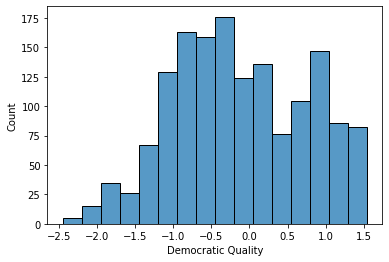

In [24]:
sns.histplot(data=df, x='Democratic Quality')

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Count'>

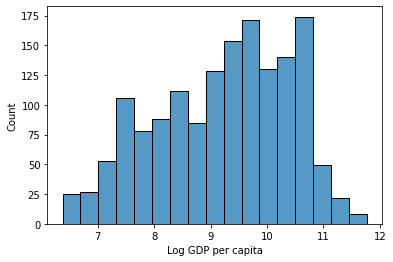

In [25]:
sns.histplot(data=df, x='Log GDP per capita')

<AxesSubplot:xlabel='Delivery Quality', ylabel='Count'>

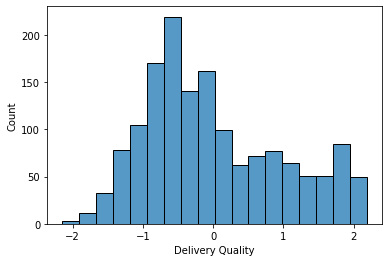

In [26]:
sns.histplot(data=df, x='Delivery Quality')

<AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Count'>

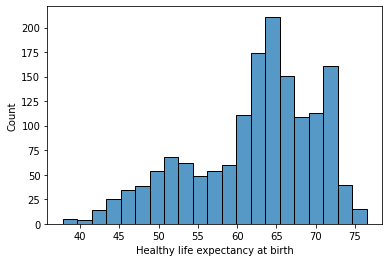

In [27]:
sns.histplot(data=df, x='Healthy life expectancy at birth')

<AxesSubplot:xlabel='Social support', ylabel='Count'>

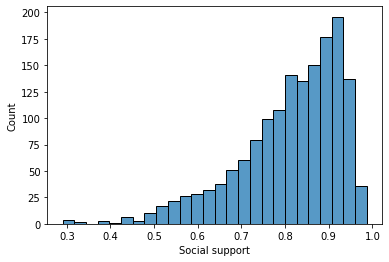

In [28]:
sns.histplot(data=df, x='Social support')

<AxesSubplot:xlabel='Positive affect', ylabel='Count'>

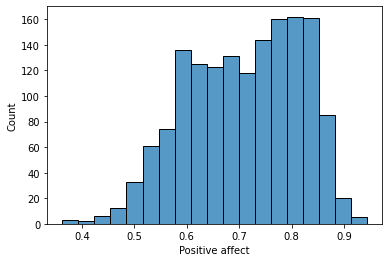

In [29]:
sns.histplot(data=df, x='Positive affect')

In [30]:
# Since the distribution of features with missing values are all skewed, 
# we replace the missing values with the medians
for column in features:
    if df[column].isnull().values.any():
        median = df[column].median()
        df[column].fillna(value=median, inplace=True)

In [31]:
np.sum(df.isnull(), axis = 0)

country                             0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Positive affect                     0
Democratic Quality                  0
Delivery Quality                    0
dtype: int64

# Outliers

<AxesSubplot:xlabel='Life Ladder', ylabel='Count'>

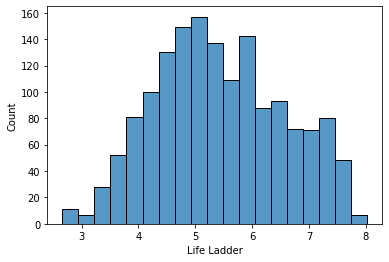

In [32]:
sns.histplot(data=df, x='Life Ladder')

In [33]:
df_z = df.select_dtypes(include=['number']).apply(stats.zscore)
df_z.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect,Democratic Quality,Delivery Quality
0,-1.525966,-1.741572,-3.024869,-1.644297,-0.080515,-1.778353,-2.084054,-1.703331
1,-0.920796,-1.601622,-2.171183,-1.592033,-0.350431,-1.160968,-2.216345,-1.682688
2,-0.602588,-1.556832,-2.282324,-1.543580,-0.892558,-0.841140,-2.155887,-1.664319
3,-1.429479,-1.532767,-2.433261,-1.498426,-1.609889,-0.905201,-2.071714,-1.663337
4,-1.473008,-1.446214,-2.437181,-1.455336,-1.368771,0.016824,-1.983804,-1.445017


In [34]:
for column in list(df_z.columns):
    print(column)
    outlier_condition = (df_z[column] > 3.29)&(df_z[column] < -3.29)
    print(df_z[outlier_condition].any(), '\n')

Life Ladder
Life Ladder                         False
Log GDP per capita                  False
Social support                      False
Healthy life expectancy at birth    False
Freedom to make life choices        False
Positive affect                     False
Democratic Quality                  False
Delivery Quality                    False
dtype: bool 

Log GDP per capita
Life Ladder                         False
Log GDP per capita                  False
Social support                      False
Healthy life expectancy at birth    False
Freedom to make life choices        False
Positive affect                     False
Democratic Quality                  False
Delivery Quality                    False
dtype: bool 

Social support
Life Ladder                         False
Log GDP per capita                  False
Social support                      False
Healthy life expectancy at birth    False
Freedom to make life choices        False
Positive affect                     False
De

In [35]:
df['label'] = stats.mstats.winsorize(df['Life Ladder'], limits=[0.01, 0.01])
df.head()

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect,Democratic Quality,Delivery Quality,label
0,Afghanistan,3.723590,7.168690,0.450662,49.209663,0.718114,0.517637,-1.929690,-1.655084,3.723590
1,Afghanistan,4.401778,7.333790,0.552308,49.624432,0.678896,0.583926,-2.044093,-1.635025,4.401778
2,Afghanistan,4.758381,7.386629,0.539075,50.008961,0.600127,0.618265,-1.991810,-1.617176,4.758381
3,Afghanistan,3.831719,7.415019,0.521104,50.367298,0.495901,0.611387,-1.919018,-1.616221,3.831719
4,Afghanistan,3.782938,7.517126,0.520637,50.709263,0.530935,0.710385,-1.842996,-1.404078,3.782938


In [36]:
df = df.drop(['country', 'Life Ladder'], axis = 1)
df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect,Democratic Quality,Delivery Quality,label
0,7.168690,0.450662,49.209663,0.718114,0.517637,-1.929690,-1.655084,3.723590
1,7.333790,0.552308,49.624432,0.678896,0.583926,-2.044093,-1.635025,4.401778
2,7.386629,0.539075,50.008961,0.600127,0.618265,-1.991810,-1.617176,4.758381
3,7.415019,0.521104,50.367298,0.495901,0.611387,-1.919018,-1.616221,3.831719
4,7.517126,0.520637,50.709263,0.530935,0.710385,-1.842996,-1.404078,3.782938


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [39]:
# Create train and test dataset.
y = df['label']
X = df.drop('label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [41]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate
lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_pred, squared = False)
lr_r2 = r2_score(y_test, lr_pred)
print('Linear Regression RMSE: ', lr_rmse)
print('Linear Regression R2: ', lr_r2)

Linear Regression RMSE:  0.575074005306222
Linear Regression R2:  0.7271058204093583


In [53]:
# Train a Decision Tree model
params = {'max_depth':[3, 4, 8, 16, 32], 'min_samples_leaf': [15, 25, 50, 100]}
dt_model = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_model, params, cv = 3,
                      scoring = 'neg_root_mean_squared_error')
dt_gridSearch = dt_grid.fit(X_train, y_train)
print('Grid Search Done')

Grid Search Done


In [54]:
# Train a Decision Tree with the best parameters
dt_best_params = {'best_max_depth': dt_gridSearch.best_estimator_.max_depth,
'best_min_samples_leaf': dt_gridSearch.best_estimator_.min_samples_leaf}
print('Decision Tree best parameters:',dt_best_params)

dt_model = DecisionTreeRegressor(max_depth = dt_best_params['best_max_depth'],
                                min_samples_leaf = dt_best_params['best_min_samples_leaf'])
dt_model.fit(X_train, y_train)

# Re-evaluate
dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_pred, squared = False)
dt_r2 = r2_score(y_test, dt_pred)
print('Decision Tree RMSE: ', dt_rmse)
print('Decision Tree R2: ', dt_r2)

Decision Tree best parameters: {'best_max_depth': 4, 'best_min_samples_leaf': 25}
Decision Tree RMSE:  0.527491439732243
Decision Tree R2:  0.7703969612923508


In [59]:
# Train a Gradient Boosting Decision Tree model
params = {'max_depth':[5, 8, 16], 'n_estimators': [100, 200, 300]}
gbdt_model =  GradientBoostingRegressor()
gbdt_grid = GridSearchCV(gbdt_model, params, cv = 3,
                      scoring = 'neg_root_mean_squared_error')
gbdt_gridSearch = gbdt_grid.fit(X_train, y_train)
print('Grid Search Done')

Grid Search Done


In [62]:
# Train a GBDT with the best parameters
gbdt_best_params = {'best_max_depth': gbdt_gridSearch.best_estimator_.max_depth,
'best_n_estimators': gbdt_gridSearch.best_estimator_.n_estimators}
print('GBDT best parameters:',gbdt_best_params)

gbdt_model = GradientBoostingRegressor(
    max_depth = gbdt_best_params['best_max_depth'],
    n_estimators = gbdt_best_params['best_n_estimators'])
gbdt_model.fit(X_train, y_train)

# Re-evaluate
gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, gbdt_pred, squared = False)
gbdt_r2 = r2_score(y_test, gbdt_pred)
print('GBDT RMSE: ', gbdt_rmse)
print('GBDT R2: ', gbdt_r2)

GBDT best parameters: {'best_max_depth': 5, 'best_n_estimators': 200}
GBDT RMSE:  0.4292143260630822
GBDT R2:  0.8479819289674971


In [65]:
# Train a Random Forest model
params = {'max_depth':[8, 16, 32, 64], 'n_estimators': [100, 200, 300]}
rf_model =  RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, params, cv = 3,
                      scoring = 'neg_root_mean_squared_error')
rf_gridSearch = rf_grid.fit(X_train, y_train)
print('Grid Search Done')

Grid Search Done


In [66]:
# Train a Random Forest with the best parameters
rf_best_params = {'best_max_depth': rf_gridSearch.best_estimator_.max_depth,
'best_n_estimators': rf_gridSearch.best_estimator_.n_estimators}
print('Random Forest best parameters:',rf_best_params)

rf_model = RandomForestRegressor(
    max_depth = gbdt_best_params['best_max_depth'],
    n_estimators = gbdt_best_params['best_n_estimators'])
rf_model.fit(X_train, y_train)

# Re-evaluate
rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared = False)
rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest R2: ', rf_r2)

Random Forest best parameters: {'best_max_depth': 64, 'best_n_estimators': 300}
Random Forest RMSE:  0.47333828390421373
Random Forest R2:  0.8151199444646916


In [68]:
# Train a Stacking model combining the models above
estimators = [("DT", DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 25)),
              ("RF", RandomForestRegressor(max_depth = 64, n_estimators = 300)),
              ("GBDT", GradientBoostingRegressor(max_depth = 5, n_estimators = 200)),
              ("LR", LinearRegression())]
st_model = StackingRegressor(estimators = estimators, cv = 5, passthrough = False)
st_model.fit(X_train, y_train)

# Evaluate
st_pred = st_model.predict(X_test)
st_rmse = mean_squared_error(y_test, st_pred, squared = False)
st_r2 = r2_score(y_test, st_pred)
print('Stacking RMSE: ', st_rmse)
print('Stacking R2: ', st_r2)

Stacking RMSE:  0.39333957708743894
Stacking R2:  0.8723319890699752


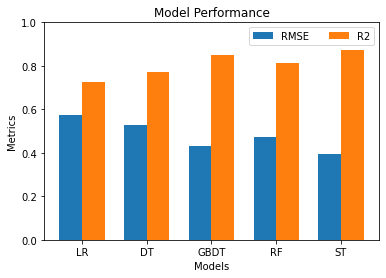

In [70]:
# Visualize model performance
RMSEs = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse, st_rmse]
R2s = [lr_r2, dt_r2, gbdt_r2, rf_r2, st_r2]
labels = ['LR', 'DT', 'GBDT', 'RF', 'ST']

rg = np.arange(5)
width = .35
plt.bar(rg, RMSEs, width, label='RMSE')
plt.bar(rg+width, R2s, width, label='R2')
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("Metrics")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper right', ncol=2)
plt.show()

Based on the visualization, we can see that stacking ensemble method gives the best performance of prediction.